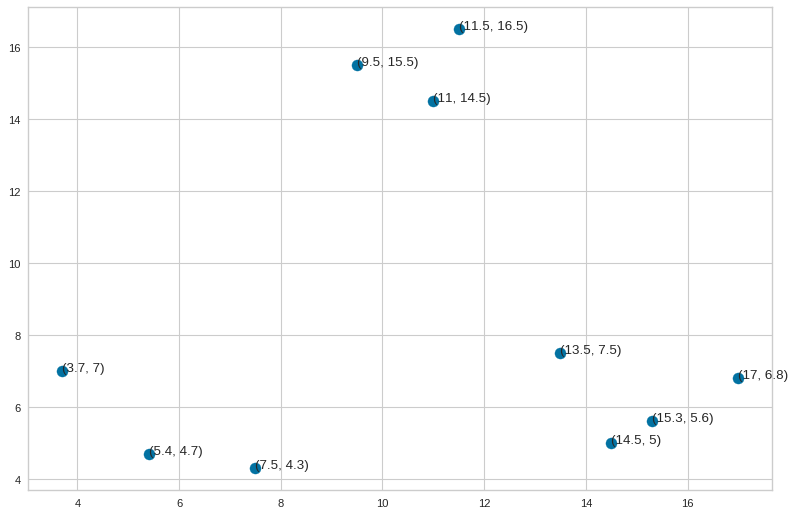

In [82]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

x = [11.5, 9.5, 11, 13.5, 17, 15.3, 14.5, 3.7, 5.4, 7.5]
y = [16.5, 15.5, 14.5, 7.5, 6.8, 5.6, 5, 7, 4.7, 4.3]

plt.figure(figsize=(12, 8), dpi=80)
plt.scatter(x,y, s=100)

for i, txt in enumerate(zip(x, y)):
    plt.annotate(txt, (x[i], y[i]))



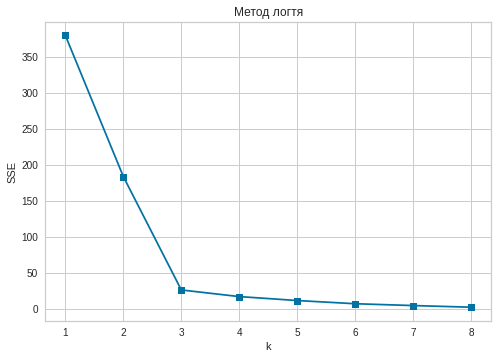

In [83]:
a = {"x":pd.Series(x), "y": pd.Series(y)}
a = pd.DataFrame(a)
SSE = []

for k in range(1,9):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(a)
    SSE.append(kmeans.inertia_)
 
plt.plot(range(1,9), SSE, marker='s');
plt.xlabel('k')
plt.title("Метод логтя")
plt.ylabel('SSE');
plt.show()

In [84]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(a)
Y_pred = kmeans.labels_
a['cluster'] = Y_pred

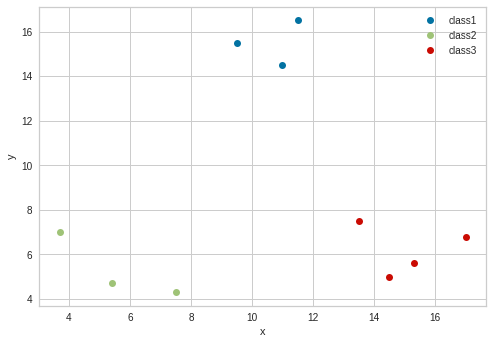

In [85]:
plt.plot(a[a['cluster']==0]['x'], a[a['cluster']==0]['y'], 'bo', label='class1')

plt.plot(a[a['cluster']==1]['x'], a[a['cluster']==1]['y'], 'go', label='class2')

plt.plot(a[a['cluster']==2]['x'], a[a['cluster']==2]['y'], 'ro', label='class3')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=0)
plt.show()

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a27e3b1d0>,
                     colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=3,
                                      random_state=42))

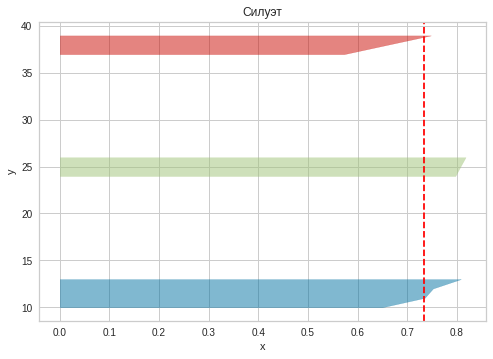

In [76]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots()

km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=42)
 
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Силуэт")
visualizer.fit(a)